# Exam 1 - Introduction to Data Science - Fall 2021

## Guidelines
- Answer in the Markdown or code cells given below the questions.
- Feel free to use the lecture notes and other resources but work on your own!
- Comment code where appropriate for clarity.
- Use only packages that are loaded with the code in a given problem.

# Problem 1

## 1.1
We load [_lowbt_](https://www.openml.org/d/203) for you. 

In [2]:
# Scikit-learn function used to load dataset from OpenML.
from sklearn.datasets import fetch_openml 

# Load 'lowbwt' bunch from OpenML.
lowbwt_bunch = fetch_openml('lowbwt', version=1, as_frame=True) 
# Extract dataset from bunch.
lowbwt = lowbwt_bunch.data
display(lowbwt)

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV
0,0,19.0,182.0,2,0,0,0,1,0
1,0,33.0,155.0,3,0,0,0,0,3
2,0,20.0,105.0,1,1,0,0,0,1
3,0,21.0,108.0,1,1,0,0,1,2
4,0,18.0,107.0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
184,1,28.0,95.0,1,1,0,0,0,2
185,1,14.0,100.0,3,0,0,0,0,2
186,1,23.0,94.0,3,1,0,0,0,0
187,1,17.0,142.0,2,0,0,1,0,0


Plot a **density histogram** for the ages of mothers with no uterine irritability.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lowbwt_subset = lowbwt[lowbwt['UI']=='0']
sns.histplot(lowbwt_subset['AGE'], kde=True,stat="density")
plt.show()

NameError: name 'lowbwt' is not defined

## 1.2
A student runs the following code to test the behavior of the scipy.stats i.i.d. random variate generation for a standard normal $\mathcal{N}(0, 1)$ distribution. He wants to check whether the variance of a randomly generated i.i.d. sample of size ten will be close to the theoretical variance of $1$ on average. To accomplish this, he 

1. Simulates 10,000 random i.i.d. samples of size ten.
2. Takes the variances of each of the 10,000 samples.
3. Averages all of these variances, and prints the average.

When he does this, he gets an average of variance that is close to $0.90$ instead of $1.00$. He wrongly concludes that scipy.stats is broken. Change one line of code so that the average variance will be as expected.

In [24]:
import scipy.stats as stats
import numpy as np

# CORRECT ONE LINE IN THE FOLLOWING CODE

# Generate 10,000 random samples of size ten.
samples = stats.norm.rvs(size=[10000,10], random_state=553)
# Take variance of each sample.
sample_variances = np.var(samples,  axis=0)
# Take average of variances.
average_variance = np.mean(sample_variances)
# Print.
print(average_variance)

0.9973667994420277


# Problem 2

## 2.1
The empirical cumulative distribution function (ECDF) $\hat{F}_{n}(t)$ of the samples $\{x_1,x_2,\ldots,x_n\}$ is defined by

$$\hat{F}_{n}(t) = \frac{1}{n}\sum_{i=1}^n \mathbf{1}_{x_i \leq t} = \frac{\#\{\text{$i$ such that $x_i \leq$ t}\}}{n},$$

Here, $\mathbf{1}_{x_i \leq t}$ is equal to $1$ if $x_i \leq t$ and equal to $0$ otherwise.

We load the samples to the numpy array `samples` below.

In [25]:
import numpy as np
samples = np.array([
    -0.986884764999009, -0.851970773256441, -0.867796672206323, 1.16345615827449, -1.10159468310786, 
    -1.09025113310314, -1.00814879621656, 0.806680833662076, 1.06986054952863, 0.791445538608714, 
    -1.12102128751188, 1.04386395472623, -0.881116187067203, -0.941977270883302, 0.890590388346183
])

Manually implement an empirical CDF function of the provided samples $\{x_1,\ldots,x_n\}$, then run the cell to plot the ECDF of the samples.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def my_ecdf(vec, dat):
    # YOUR CODE HERE.
    

    cdf_vals =      # assign the CDF values for "vec" here
    return cdf_vals

horiz_axis = np.linspace(min(samples), max(samples), 100)
plt.plot(horiz_axis, my_ecdf(horiz_axis, samples))
plt.show()

## 2.2
The following code is an attempt to implement triangular kernel density estimation from the sample $\{x_1,\ldots,x_n\}$ provided by `samples`, where the triangular kernel $K(x)$ is defined by

$$ K(x) = \begin{cases} 1 - \lvert x \rvert \text{ if $\lvert x \rvert \leq 1 $} \\ 0 \text{ otherwise}\end{cases}$$

In the first cell, we load a sample to the numpy array `samples`.

In [103]:
import numpy as np

# Load sample.
samples = np.array([
    -0.986884764999009, -0.851970773256441, -0.867796672206323, 1.16345615827449, -1.10159468310786, 
    -1.09025113310314, -1.00814879621656, 0.806680833662076, 1.06986054952863, 0.791445538608714, 
    -1.12102128751188, 1.04386395472623, -0.881116187067203, -0.941977270883302, 0.890590388346183
])

In the following cell, there is an error either in the function definition of `kernel` or of `density` which causes the integration of the KDE to be not close to 1. Correct the error.

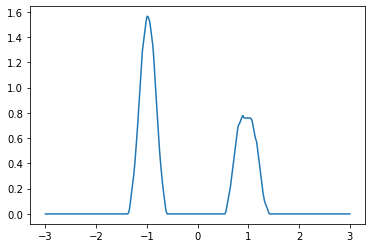

0.9999269874966021

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# CORRECT THE FOLLOWING CODE

# Triangular kernel function.
def kernel(x, dat, bw):
    t = 1 - abs((x - dat) / bw)
    t[t<0] = 0
    return(t) 

# Kernel density estimator function.
def density(x, sample, bw):
    f = np.zeros(len(x))
    for dat in sample:        
        f = f + kernel(x, dat, bw)
    return(f / (len(sample)*bw))

# Plot kernel density estimate for sample.
x = np.linspace(-3,3, num = 500)
p = density(x, samples, 0.25)
plt.plot(x, p)
plt.show()

# Check integral of kernel density estimate.
np.trapz(p, x)

# Problem 3

## 3.1

Use the [SciPy _stats_ library](https://docs.scipy.org/doc/scipy/reference/stats.html) to generate a random sample of size 10,000 from an [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) with `scale=1/15`, which means that the parameter $
\lambda =15$. Use a random_state of 553. Plot a density histogram of the result with 100 bins, and overlay the density of the distribution.

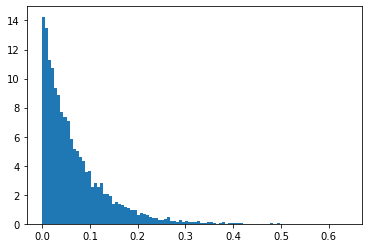

In [34]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# YOUR CODE HERE.

sample_expo = stats.expon.rvs(size=10000,scale=1/15, random_state=553)
plt.hist(sample_expo, density=True, bins=100)
plt.show()

# 3.2
The following code is an attempt to implement rejection sampling from a [Student's $t$-distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) with `df=5`. More precisely, the target distribution is supposed to be a Student's $t$-distribution with `df=5`, and the candidate distribution is supposed to be a standard normal distribution (a $\mathcal{N}(0,1)$ distribution). 

As you can see, the output is off. Change one line of code to produce the correct output.

Number of samples:	 4053


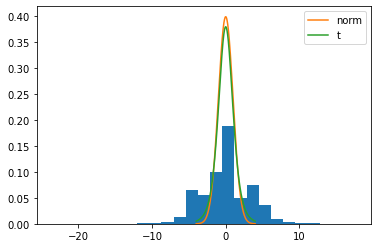

In [3]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# CORRECT ONE LINE IN THE FOLLOWING CODE

trials = 100000
df = 5
U = stats.uniform.rvs(loc=0, scale=1, size=trials, random_state=436)
Y = stats.t.rvs(df=df, size=trials, random_state=636)

x = np.linspace(-4, 4, 1000)
M = np.max(stats.t.pdf(x, df=df) / stats.norm.pdf(x))

f = stats.t.pdf(Y, df=df)
g = stats.norm.pdf(Y)
ratio = f/g
samples = Y[U <= ratio/M]

print('Number of samples:\t', len(samples))
plt.hist(samples, density=True, bins=25)
plt.plot(x, stats.norm.pdf(x), label='norm')
plt.plot(x, stats.t.pdf(x, df=df), label='t')
plt.legend()
plt.show()

In [52]:
M

38.28527541244189

# Problem 4

## 4.1
In the following cell, we load the _boston_ dataset, store its feature names in the variable `labels`, and divide it into a training and test set.

In [56]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston_bunch = load_boston()
X = boston_bunch.data
y = boston_bunch.target
labels = boston_bunch.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=553)

1. Perform Lasso regression on all predictor variables in the training set to predict housing price. Choose the largest alpha in the interval [0, 1], to the nearest tenth, at which the test R-squared of the resulting predictions is above 0.65.
2. Print the alpha that you choose along with the resulting R-squared. 
3. Print a list of the names of the variables positively associated with housing price and a list of the names of the variables negatively associated with housing price.

In [68]:
import numpy as np
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.01, normalize=True)
lassoReg.fit(X_train, y_train)
pred = lassoReg.predict(X_test)
alpha = 0.01                # the regularization parameter alpha

#YOUR CODE HERE.

R_squared = lassoReg.score(X_test,y_test,sample_weight=None)              # the R-squared

Positive_features = labels[lassoReg.coef_>0]     # the names of the variables positively associated with housing price
Negative_features = labels[lassoReg.coef_<0]        # the names of the variables negatively associated with housing price
print('{:<15} {}'.format('Alpha:', alpha))
print('{:<15} {}'.format('R-squared:', R_squared))
print('{:<15} {}'.format('Positive:', Positive_features))
print('{:<15} {}'.format('Negative:', Negative_features))

Alpha:          0.01
R-squared:      0.6736299754173078
Positive:       ['ZN' 'CHAS' 'RM' 'RAD' 'B']
Negative:       ['CRIM' 'NOX' 'DIS' 'PTRATIO' 'LSTAT']


## 4.2
A student decides to select a predictive model for housing price on the basis of MSE. He runs the following code to fit three different models.

In [69]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.preprocessing as prepro

# MODEL 1: using all predictor variables
X_train_1, X_test_1 = X_train, X_test
reg_1 = LinearRegression().fit(X_train_1, y_train)

# MODEL 2: using only AGE, NOX, DIS, and RAD as predictor variables
ind = np.where([a in ['ZN', 'RM', 'AGE', 'RAD', 'B'] for a in boston_bunch.feature_names])[0]
X_train_2, X_test_2 = X_train[:,ind], X_test[:,ind]
reg_2 = LinearRegression().fit(X_train_2, y_train)

# MODEL 3: using all polynomial combinations of degree <=5 of the original thirteen predictor variables
poly = prepro.PolynomialFeatures(5)
X_train_3, X_test_3 = poly.fit_transform(X_train), poly.fit_transform(X_test)
reg_3 = LinearRegression().fit(X_train_3, y_train)

Based on the following code and output, he selects MODEL 3 for having the best MSE. The student made a mistake on one line: correct that line.

In [70]:
# CORRECT THE FOLLOWING CODE IN ONE LINE

# Function for comparing MSE of models on data.
def model_comparison(model_list, features_list, target):
    k = 0
    for model in model_list:
        # Calculate MSE.
        mse = mean_squared_error(target, model.predict(features_list[k]))
        # Print model name.
        print('MODEL', k+1)
        # Print MSE.
        print('{:<15} {}'.format('MSE:', mse))
        k = k+1
    return

model_list = [reg_1, reg_2, reg_3]
features_list, target = [X_test_1, X_test_2, X_test_3], y_test
model_comparison(model_list, features_list, target)

MODEL 1
MSE:            29.07983300093228
MODEL 2
MSE:            42.4252876942497
MODEL 3
MSE:            30813.631492495286


# Problem 5

## 5.1
We load the [following dataset](https://www.openml.org/d/1524) on 310 orthopedic patients, including 6 predictors concerning the orientation of bones in the lower back, as well as a target class variable for normal (`2`) or abnormal (`1`) spinal health. We scale the predictors.

In [71]:
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler

vertebra = pd.read_csv('https://www.openml.org/data/get_csv/1593720/phpZeLjnh')
predictors = vertebra.iloc[:,0:6]
target = vertebra.iloc[:,6]

print(vertebra)

scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)

print(predictors_scaled)

            V1         V2         V3         V4          V5         V6  Class
0    63.027818  22.552586  39.609117  40.475232   98.672917  -0.254400      1
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259      1
2    68.832021  22.218482  50.092194  46.613539  105.985136  -3.530317      1
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523      1
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501      1
..         ...        ...        ...        ...         ...        ...    ...
305  47.903565  13.616688  36.000000  34.286877  117.449062  -4.245395      2
306  53.936748  20.721496  29.220534  33.215251  114.365845  -0.421010      2
307  61.446597  22.694968  46.170347  38.751628  125.670725  -2.707880      2
308  45.252792   8.693157  41.583126  36.559635  118.545842   0.214750      2
309  33.841641   5.073991  36.641233  28.767649  123.945244  -0.199249      2

[310 rows x 7 columns]
[[ 0.14708639  0.50136874 -0.6651769  -0

Compute and store the PCA transformation of the scaled predictors using all principal components.

In [76]:
from sklearn.decomposition import PCA

# YOUR CODE HERE

pca = PCA(n_components=6)
Proj_predictors = pca.fit_transform(predictors_scaled)  # the PCA transformation of the scaled predictors using all principal components

## 5.2
How many PC's should be retained to account for 80% of the variance in the scaled predictors? Justify your answer.

In [84]:
import numpy as np
from sklearn.decomposition import PCA

# YOUR CODE HERE
sum(pca.explained_variance_ratio_[:3])

0.8669090632480623

In [85]:
pca.explained_variance_ratio_[:3]

array([0.54096355, 0.1990971 , 0.12684842])

### _Answer:_ 
Three Principal components should be retained.